## K-Means Clustering (Non-Hierarchical Clustering)

### Introduction

**K-Means clustering is one of the most widely used unsupervised machine learning algorithms. It groups data points into a predefined number of clusters based on similarity. Unlike hierarchical clustering, K-Means does not build a dendrogram. Instead, it uses an iterative optimization process to assign each data point to the nearest cluster center.**

The main idea behind K-Means is simple:
Group data so that points within a cluster are as close as possible to each other and as far as possible from points in other clusters.

K-Means is especially useful when:

- You have unlabeled data.

- You want to discover natural patterns or groupings.

- You need a fast, scalable clustering method.

It is widely used in customer segmentation, anomaly detection, image compression, document clustering, and market basket analysis.


### Steps Involved in K-Means Clustering

1. Define K (the number of clusters).
Based on the chosen K value, the dataset is divided conceptually into K groups.

2. Compute the centroid for each group.
A centroid is the mean position of all data points within a cluster.

3. Find the distance from each data point to all cluster centroids.
Typically Euclidean distance is used.

4. Move each data point to the nearest cluster centroid.
The point is assigned to whichever cluster it is closest to.

5. Recompute the centroid after repositioning.
Since data points moved, the centroid must be recalculated.

6. Repeat steps 3 to 5
Continue the process until none of the data points change their cluster assignment, meaning the algorithm has converged.

### Goal of K-Means

**“All the data points should have minimum distance from their own cluster centroid.”**

This means each cluster should be internally tight and externally well separated.

## Practical understanding

#### Importing all the req Lib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans

In [3]:
Univ = pd.read_csv("Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [6]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])
print (scaled_Univ_df)

[[ 0.41028362  0.6575195  -0.88986682  0.07026045 -0.33141256  0.82030265]
 [ 1.39925928  1.23521235 -0.73465749 -1.68625071  2.56038138 -0.64452351]
 [-0.06065717 -0.76045386  1.02438157 -0.93346022 -0.16712136 -1.65863393]
 [ 0.41028362 -0.02520842 -0.78639393 -0.18066972  0.29164871  0.14422904]
 [ 0.12771914  0.34241431 -0.32076595  0.07026045 -0.39084607  0.36958691]
 [ 0.69284809  0.6575195  -0.83813038 -0.68253005  0.33778044  0.93298158]
 [ 0.4573777   0.71003703 -0.47597528 -0.18066972  0.29695528  0.93298158]
 [-0.10775125 -0.13024348 -0.78639393 -0.18066972 -0.51381683  0.59494478]
 [ 1.25797704  0.76255456 -1.30375836 -0.43159988  0.85874344  1.15833946]
 [ 0.36318954 -0.07772595  0.24833493 -1.43532055  2.21481798  0.0315501 ]
 [ 1.06960072  0.92010716 -0.47597528 -0.68253005  0.52938275  0.48226584]
 [-0.06065717  0.44744937 -0.01034729 -0.43159988  0.04698077  0.25690797]
 [-0.10775125  0.23737924  0.14486204  0.07026045 -0.86787073  0.82030265]
 [-1.7466252  -2.02087462

# How to find optimum number of  cluster

#### The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [8]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[149.99999999999997,
 64.14528395010268,
 47.47264116827912,
 40.027426645647346,
 31.571015429354773,
 27.99099795080375,
 25.037828828984292,
 17.69864042649729,
 14.74547130467783,
 12.052878077473405]

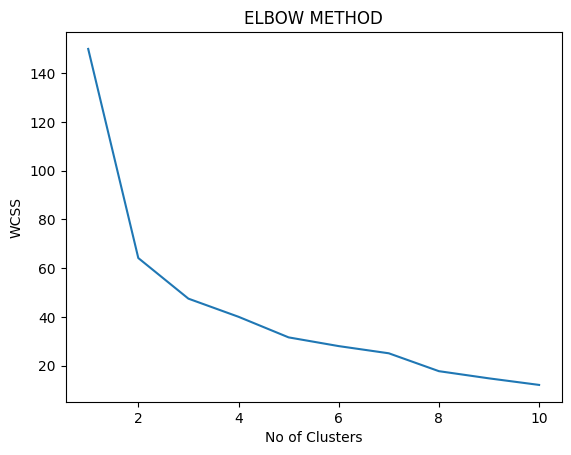

In [10]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

## XPLORE THE OTHER CLUSTER VALIDATION TECHNIQUES

- Silhouette score

- Calinski harabasz score

- Work with IRIS Dataset. Remove your target column.

In [13]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3)#, random_state=12)
clusters_new.fit_predict(scaled_Univ_df)

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2], dtype=int32)

In [15]:
clusters_new.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2], dtype=int32)

In [16]:
#Assign clusters to the data set
Univ["clusterid_new"] = clusters_new.labels_

In [17]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [19]:
#These are standardized values.
clusters_new.cluster_centers_

array([[ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ],
       [-1.43266468, -1.54821683,  1.48138682,  1.07398111, -0.99079432,
        -1.43327606],
       [ 0.4019729 ,  0.47834204, -0.4942352 , -0.19543032,  0.06879803,
         0.5419194 ]])

In [24]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
1,CalTech,1415,100,25,6,63575,81,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [25]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,0


## Silhoette Score

In [37]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)

In [38]:
type(iris)

pandas.core.frame.DataFrame

In [39]:
del iris

In [40]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)


In [41]:
type(iris)

pandas.core.frame.DataFrame

In [42]:
from sklearn.metrics import silhouette_score as sil
from sklearn.cluster import KMeans

nc = [2,3,4,5,6,7,8,9]
iner = []

for i in nc:
    km = KMeans(n_clusters=i, n_init='auto')
    y = km.fit_predict(iris.iloc[:, :4])
    iner.append(sil(iris.iloc[:, :4], y))

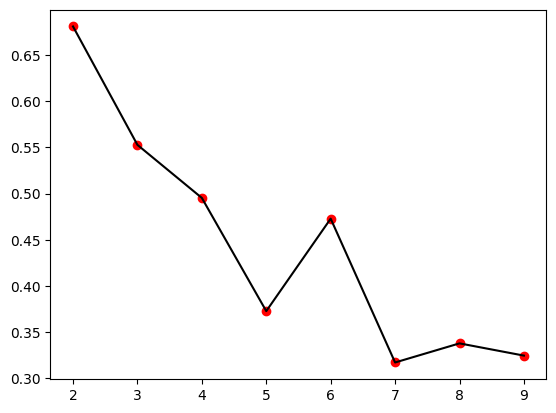

In [43]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

## Calinski_harabaz_score

In [46]:
from sklearn.metrics import calinski_harabasz_score as chs
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd

# Load iris correctly
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)

nc = [2,3,4,5,6,7,8,9]
iner = []

for i in nc:
    km = KMeans(n_clusters=i, n_init='auto')
    y = km.fit_predict(iris.iloc[:,:4])
    iner.append(chs(iris.iloc[:,:4], y))

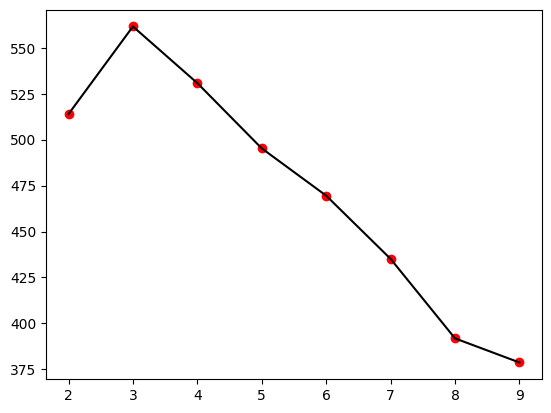

In [47]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# The End !!